In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier as dtree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
A= pd.read_csv("income_evaluation.csv")

In [3]:
A.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
A.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
A.shape

(32561, 15)

In [6]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
A.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
A.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [9]:
len(A.columns)

15

In [10]:
A['age'][0:5]

0    39
1    50
2    38
3    53
4    28
Name: age, dtype: int64

In [11]:
A.dtypes

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income            object
dtype: object

In [12]:
A.columns = list(map(lambda a: a.lstrip(), A.columns))
A.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [13]:
A['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [14]:
shape0 = A.shape[0]
for column in A.columns:
    A[column].replace(' ?', np.NaN, inplace=True)
A = A.dropna().reset_index().drop(columns=['index'])
shape1 = A.shape[0]
print(str(shape0 - shape1) + ' rows have been removed.')

2399 rows have been removed.


In [15]:
income = A.income.value_counts()
income

 <=50K    22654
 >50K      7508
Name: income, dtype: int64

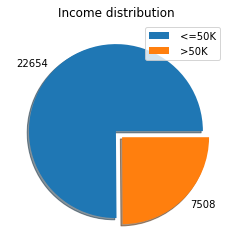

In [16]:
explode = [0, 0.1]
plt.pie(income, labels=income.values, explode = explode, shadow=True)
plt.title('Income distribution')
plt.legend(labels=income.index)

In [17]:
A['income'].replace([' <=50K',' >50K'],[1,0], inplace=True)

In [18]:
stats = A.select_dtypes(['float', 'int64']).drop(columns=['income'])

Text(0.5, 1.0, 'Correlation Factors Heat Map')

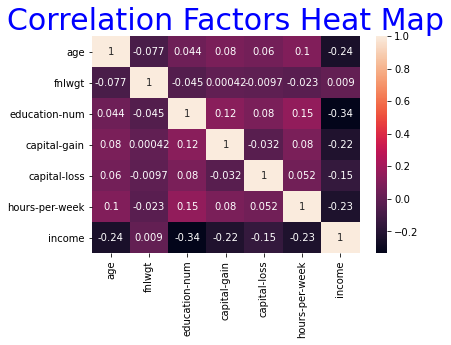

In [19]:
sns.heatmap(A.corr(), annot=True).set_title('Correlation Factors Heat Map', color='blue', size='30')

In [20]:
A_final = pd.get_dummies(A)
A_final.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [21]:
num_atr=['fnlwgt' , 'capital-gain', 'capital-loss', 'hours-per-week']

cat_atr=['age', 'workclass' , 'education' , 'education-num' , 'marital-status' , 'occupation' , 'relationship', 'race', 'sex', 'native-country']
A.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599,-0.241998
fnlwgt,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886,0.008957
education-num,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522,-0.335286
capital-gain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432,-0.221196
capital-loss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417,-0.150053
hours-per-week,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000,-0.229480
income,-0.241998,0.008957,-0.335286,-0.221196,-0.150053,-0.229480,1.000000


KNN Classification

In [22]:
from sklearn.model_selection import train_test_split
X= A.drop(['income'], axis=1)
y= A['income']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.preprocessing import OneHotEncoder as onehot
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)

C:\ProgramData\Anaconda31\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [25]:
X_train[cat_atr].head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,native-country
25899,2,2,15,9,4,7,3,4,1,38
10577,17,2,15,9,2,7,0,4,1,25
20907,17,2,12,13,2,9,5,1,0,2
9209,3,2,15,9,4,9,1,4,0,38
15683,26,2,9,12,2,11,0,4,1,38


In [26]:
ss = StandardScaler()
ss.fit_transform(X_train[num_atr])

array([[ 0.83451879, -0.14881953, -0.21848139, -2.39691124],
       [-0.46145182, -0.14881953, -0.21848139,  1.74615559],
       [-0.96111966, -0.14881953, -0.21848139, -0.07679381],
       ...,
       [-0.77023734, -0.14881953, -0.21848139, -1.73402054],
       [ 1.07024007, -0.14881953, -0.21848139, -0.07679381],
       [ 0.52971413, -0.14881953, -0.21848139, -0.07679381]])

In [27]:
a = X_train[cat_atr]
b = ss.transform(X_train[num_atr])

Xtr = np.hstack([a,b])
Xtr.shape 

(21113, 14)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(Xtr, y_train)

KNeighborsClassifier(metric='euclidean')

In [29]:
ss = StandardScaler()
ss.fit_transform(X_test[num_atr])
le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)
a1 = X_test[cat_atr]
b1 = ss.transform(X_test[num_atr])

Xtr1 = np.hstack([a1,b1]) 
Xtr1.shape 

C:\ProgramData\Anaconda31\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(9049, 14)

In [30]:
y_pred = knn.predict(Xtr1)

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1279, 1001],
       [ 735, 6034]], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8081555973035695

In [33]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred)

(array([0.63505462, 0.85771144]),
 array([0.56096491, 0.89141675]),
 array([0.59571495, 0.87423935]),
 array([2280, 6769], dtype=int64))

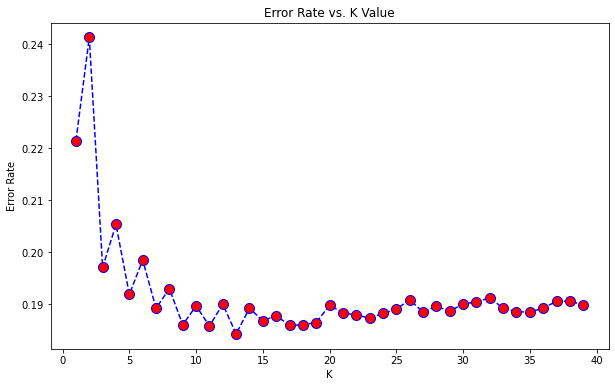

Minimum error:- 0.1842192507459388 at K = 13


In [34]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(Xtr,y_train)
 pred_i = knn.predict(Xtr1)
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [35]:
knn = KNeighborsClassifier(n_neighbors=22, metric='euclidean')
knn.fit(Xtr, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=22)

In [36]:
y_pred = knn.predict(Xtr1)
accuracy_score(y_test, y_pred)

0.8121339374516521

Decision Tree

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [38]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [39]:
A.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [40]:
X= A.drop(['income'], axis=1)
y= A['income']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)

C:\ProgramData\Anaconda31\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [42]:
ss = StandardScaler()
ss.fit_transform(X_train[num_atr])

array([[ 0.83451879, -0.14881953, -0.21848139, -2.39691124],
       [-0.46145182, -0.14881953, -0.21848139,  1.74615559],
       [-0.96111966, -0.14881953, -0.21848139, -0.07679381],
       ...,
       [-0.77023734, -0.14881953, -0.21848139, -1.73402054],
       [ 1.07024007, -0.14881953, -0.21848139, -0.07679381],
       [ 0.52971413, -0.14881953, -0.21848139, -0.07679381]])

In [43]:
a = X_train[cat_atr]
b = ss.transform(X_train[num_atr])

Xtr = np.hstack([a,b])
Xtr.shape 

(21113, 14)

In [44]:
ss = StandardScaler()
ss.fit_transform(X_test[num_atr])
le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)
a1 = X_test[cat_atr]
b1 = ss.transform(X_test[num_atr])

Xtr1 = np.hstack([a1,b1]) 
Xtr1.shape 

array([[ 0.12152282, -0.14438292, -0.21888854,  2.04394611],
       [ 0.2606995 , -0.14438292, -0.21888854,  0.76957805],
       [ 0.48154169, -0.14438292, -0.21888854, -2.20394744],
       ...,
       [-0.69765578, -0.14438292, -0.21888854, -1.77915809],
       [-0.72225599, -0.14438292, -0.21888854, -0.08000067],
       [ 3.36272674, -0.14438292, -0.21888854, -1.35436873]])

C:\ProgramData\Anaconda31\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(9049, 14)

In [45]:
dt = dtree(
           criterion="entropy",   
           max_depth=None       
                             
           )

_=dt.fit(X_train,y_train)

In [46]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [47]:
y_pred = dt.predict(Xtr1)

In [48]:
np.sum((y_test == y_pred))/y_test.size

0.7437285887943419

In [49]:
A.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [50]:
A['income'].unique()

array([1, 0], dtype=int64)

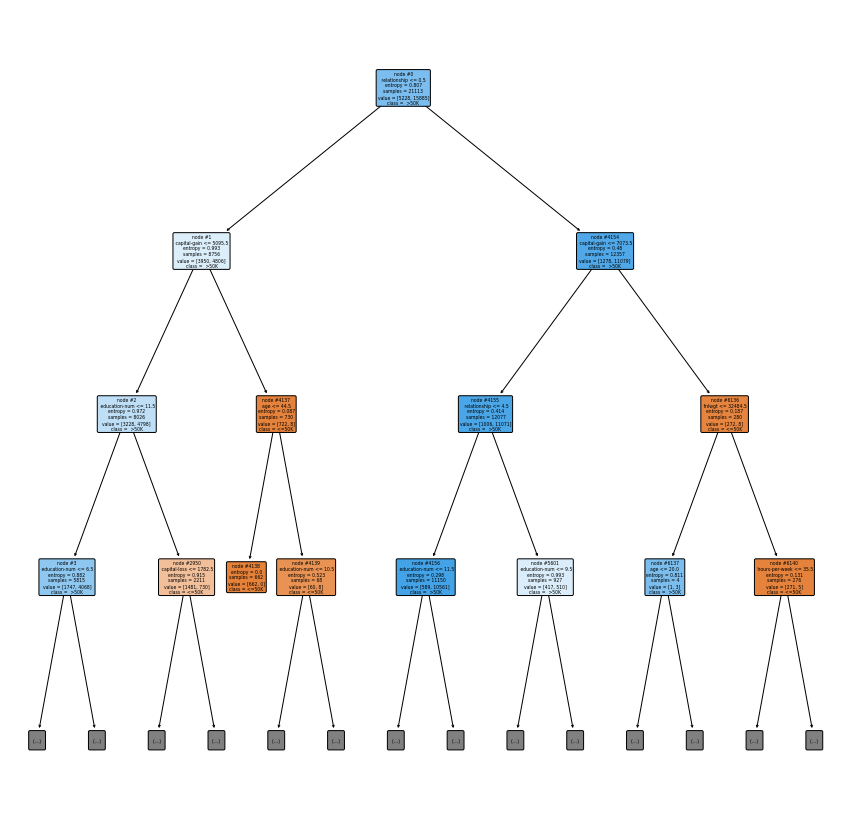

In [51]:
_=plt.figure(figsize=(15,15))
_=plot_tree(
            dt,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country'],
            class_names = ['<=50K',' >50K']
            )

_=plt.show()

Random Forest 

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.preprocessing import OneHotEncoder as onehot
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)
clf.fit(Xtr,y_train)
y_pred=clf.predict(Xtr1)

RandomForestClassifier()

In [54]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8515858105868052


In [55]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
metrics.confusion_matrix(y_test, y_pred)

array([[1425,  855],
       [ 488, 6281]], dtype=int64)

In [56]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [57]:
A.feature_names = A[['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']]
A.target_names = A['income']

<ipython-input-57-e8fd215536fb>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  A.feature_names = A[['age', 'workclass', 'fnlwgt', 'education', 'education-num',
<ipython-input-57-e8fd215536fb>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  A.target_names = A['income']


In [58]:
A.feature_names = A[['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']]
A.target_names = A['income']

In [60]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)
feature_imp

2     0.168458
0     0.153372
10    0.113772
7     0.101781
4     0.088014
12    0.084107
5     0.070482
6     0.068245
1     0.039748
3     0.036402
11    0.034973
13    0.014911
8     0.014023
9     0.011712
dtype: float64

In [62]:
list(zip(A.columns, feature_imp))

[('age', 0.16845768546052475),
 ('workclass', 0.15337217618615792),
 ('fnlwgt', 0.11377182318741667),
 ('education', 0.10178137853917685),
 ('education-num', 0.08801358838171777),
 ('marital-status', 0.08410678891957923),
 ('occupation', 0.0704819405386454),
 ('relationship', 0.06824525750985953),
 ('race', 0.03974829930780186),
 ('sex', 0.03640211737717567),
 ('capital-gain', 0.034972799799346366),
 ('capital-loss', 0.014911140374362935),
 ('hours-per-week', 0.014022616095698392),
 ('native-country', 0.011712388322536616)]

<AxesSubplot:>

Text(0.5, 0, 'Feature Importance Score')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Visualizing Important Features')

No handles with labels found to put in legend.


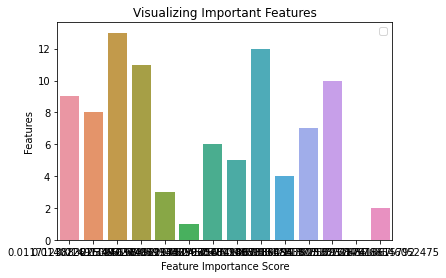

In [63]:
#visualizing feature importance results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [64]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(Xtr,y_train)
y_pred=clf.predict(Xtr1)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

RandomForestClassifier()

Accuracy: 0.8508122444469002


In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.62      0.68      2280
           1       0.88      0.93      0.90      6769

    accuracy                           0.85      9049
   macro avg       0.81      0.78      0.79      9049
weighted avg       0.85      0.85      0.85      9049

